<a href="https://colab.research.google.com/github/Cloris98/Instacart-recommendation-system-project-/blob/main/instacart_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# eCommence Recommendation System - Instacart project

### Data Exploration and quality check

## load data


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from collections import OrderedDict

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/instacart_project/instacart_data/

/content/drive/MyDrive/instacart_project/instacart_data


In [4]:
ls

 aisles.csv               model_all_data_added.csv   order_products_train.csv
 departments.csv          model_all_data.csv         orders.csv
'model_all_data(1).csv'   order_products_prior.csv   products.csv


In [5]:
# name the data files 
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
order_products_prior = pd.read_csv('order_products_prior.csv')
order_products_train = pd.read_csv('order_products_train.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')

In [6]:
# check data shape
print(aisles.shape)
print(departments.shape)
print(order_products_prior.shape)
print(order_products_train.shape)
print(orders.shape)
print(products.shape)

(134, 2)
(21, 2)
(793924, 4)
(53704, 4)
(82683, 7)
(49688, 4)


In [7]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [8]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [9]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,12,30597,1,1
1,12,15221,2,1
2,12,43772,3,1
3,12,37886,4,1
4,12,37215,5,0


In [10]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1077,13176,1,1
1,1077,39922,2,1
2,1077,5258,3,1
3,1077,21137,4,1
4,1119,6046,1,1


In [11]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1363380,50,prior,1,3,9,NaN
1,3131103,50,prior,2,6,12,10.0
2,2197066,50,prior,3,1,13,9.0
3,3201640,50,prior,4,0,11,6.0
4,2756806,50,prior,5,4,14,11.0


In [12]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


### Data Exploration

Build order history table:

In [13]:
prior_order_history = order_products_prior.merge(orders, on='order_id')
prior_order_history.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,12,30597,1,1,152610,prior,22,6,8,10.0
1,12,15221,2,1,152610,prior,22,6,8,10.0
2,12,43772,3,1,152610,prior,22,6,8,10.0
3,12,37886,4,1,152610,prior,22,6,8,10.0
4,12,37215,5,0,152610,prior,22,6,8,10.0


In [14]:
# convert day_of_week to string
prior_order_history['order_dow'] = prior_order_history['order_dow'].apply(lambda x:'Sunday' if x == 0 else x)
prior_order_history['order_dow'] = prior_order_history['order_dow'].apply(lambda x:'Monday' if x == 1 else x)
prior_order_history['order_dow'] = prior_order_history['order_dow'].apply(lambda x:'Tuesday' if x == 2 else x)
prior_order_history['order_dow'] = prior_order_history['order_dow'].apply(lambda x:'Wednesday' if x == 3 else x)
prior_order_history['order_dow'] = prior_order_history['order_dow'].apply(lambda x:'Thursday' if x == 4 else x)
prior_order_history['order_dow'] = prior_order_history['order_dow'].apply(lambda x:'Friday' if x == 5 else x)
prior_order_history['order_dow'] = prior_order_history['order_dow'].apply(lambda x:'Saturday' if x == 6 else x)
prior_order_history.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,12,30597,1,1,152610,prior,22,Saturday,8,10.0
1,12,15221,2,1,152610,prior,22,Saturday,8,10.0
2,12,43772,3,1,152610,prior,22,Saturday,8,10.0
3,12,37886,4,1,152610,prior,22,Saturday,8,10.0
4,12,37215,5,0,152610,prior,22,Saturday,8,10.0


###visulaize the data

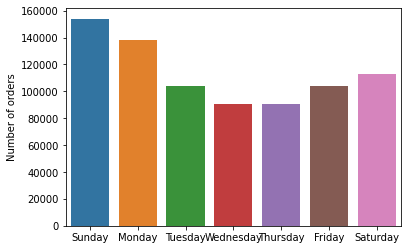

In [15]:
# plot order frequency based on dow
ax = sns.countplot(x='order_dow', data=prior_order_history, order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.xlabel('')
plt.ylabel('Number of orders')
plt.show()

In [16]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1363380,50,prior,1,3,9,NaN
1,3131103,50,prior,2,6,12,10.0
2,2197066,50,prior,3,1,13,9.0
3,3201640,50,prior,4,0,11,6.0
4,2756806,50,prior,5,4,14,11.0


In [17]:
# count orders placed each hour
order_hourly = orders.groupby('order_id')['order_hour_of_day'].mean().reset_index()
order_hourly_count = order_hourly.order_hour_of_day.value_counts()
order_hourly_count.head()

11.0    7048
10.0    6897
14.0    6844
12.0    6817
15.0    6777
Name: order_hour_of_day, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


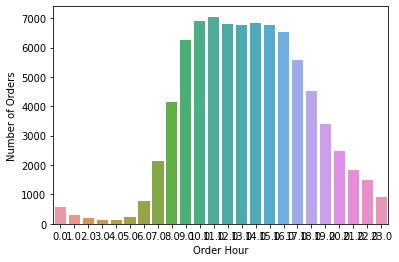

In [18]:
# plot order frenquency basd on hour_of_day
sns.barplot(order_hourly_count.index, order_hourly_count.values)
plt.xlabel('Order Hour')
plt.ylabel('Number of Orders')
plt.show()

reorder Pattern Analysis

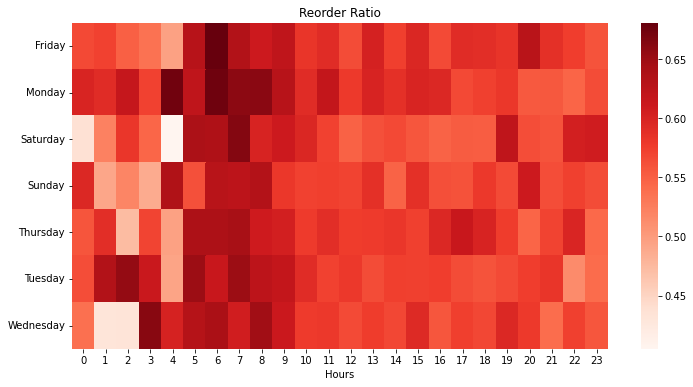

In [19]:
reorder_heatmap = prior_order_history.groupby(["order_dow", "order_hour_of_day"])["reordered"].mean().reset_index()
reorder_heatmap = reorder_heatmap.pivot('order_dow', 'order_hour_of_day', 'reordered')
plt.figure(figsize=(12,6))
sns.heatmap(reorder_heatmap,cmap="Reds")
plt.title("Reorder Ratio")
plt.ylabel("")
plt.xlabel("Hours")
plt.show()


In [20]:
# Top 3 popular product/Aisle/ Department 
products_with_name = order_products_prior.merge(products, on='product_id')
products_with_name = products_with_name.merge(aisles, on='aisle_id')
products_with_name = products_with_name.merge(departments, on='department_id')
products_with_name.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,12,30597,1,1,French Vanilla Coffee Creamer,53,16,cream,dairy eggs
1,29292,30597,7,1,French Vanilla Coffee Creamer,53,16,cream,dairy eggs
2,50422,30597,41,0,French Vanilla Coffee Creamer,53,16,cream,dairy eggs
3,94545,30597,4,1,French Vanilla Coffee Creamer,53,16,cream,dairy eggs
4,138033,30597,3,0,French Vanilla Coffee Creamer,53,16,cream,dairy eggs


In [21]:
popular_product = products_with_name.groupby('product_name').size().reset_index(name='total')
sorted_popularity = popular_product.sort_values('total',ascending=False)
sorted_popularity.head(3)

,product_name,total
2052,Banana,10951
1921,Bag of Organic Bananas,9424
16405,Organic Baby Spinach,6028


In [22]:
popular_aisle = products_with_name.groupby('aisle').size().reset_index(name='total')
popular_aisle = popular_aisle.sort_values('total', ascending=False)
popular_aisle.head(3)

,aisle,total
50,fresh fruits,86351
53,fresh vegetables,85062
98,packaged vegetables fruits,43436


In [23]:
popular_department = products_with_name.groupby('department').size().reset_index(name='total')
popular_department = popular_department.sort_values('total', ascending=False)
popular_department.head(3)

,department,total
19,produce,231189
7,dairy eggs,129910
20,snacks,71685


## Data Quality Check

The model will not allow 'NaN' data, so we need to check if there's such data. if yes, we will fill them or delete them(depennds on the case). 

In [24]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1363380,50,prior,1,3,9,NaN
1,3131103,50,prior,2,6,12,10.0
2,2197066,50,prior,3,1,13,9.0
3,3201640,50,prior,4,0,11,6.0
4,2756806,50,prior,5,4,14,11.0


The *'days_since_prior_order'* for 'order_number'=1 is 'NaN', because this is the first order, they do not have the prior order. 

In [25]:
print("Size of the order dataset: ", orders.shape[0])
print("NaN count in days_since_prior_order column: ", orders[orders.days_since_prior_order.isnull()].shape[0])
print("order_number 1 count in orders table: ", orders[orders.order_number == 1].drop_duplicates().shape[0])
print("user_id count in orders table: ", orders.user_id.drop_duplicates().shape[0])

Size of the order dataset:  82683
NaN count in days_since_prior_order column:  5000
order_number 1 count in orders table:  5000
user_id count in orders table:  5000


From above result, in Orders.csv, we lack data from 'days_since_prior_order'. the amount equals the number of 'order_number'== 1 and the amount of our customer_id. 

### Check order amount in prior table and train table

In [26]:
orders.groupby(['eval_set'], as_index=False).agg(OrderedDict([('order_id', 'nunique')]))

,eval_set,order_id
0,prior,77683
1,train,5000


In [27]:
#prior table
print("order_id count in prior: ", order_products_prior['order_id'].nunique())
print("order_id from prior found in orders: ", order_products_prior[order_products_prior.order_id.isin(orders.order_id)].order_id.nunique())

order_id count in prior:  77683
order_id from prior found in orders:  77683


In [28]:
# train table
print("orders count in train: ", order_products_train['order_id'].nunique())
print("order_id from train found in orders: ", order_products_train[order_products_train.order_id.isin(orders.order_id)].order_id.nunique())

orders count in train:  5000
order_id from train found in orders:  5000


In [29]:
# Check if there's intersection between prior table and train table
intersections = pd.merge(order_products_prior, order_products_train, on = ['order_id']).shape[0]
if intersections == 0:
  print("there's no intersection between prior and train")
else: 
  print("the intersection between prior and train are", intersections)

there's no intersection between prior and train


In [30]:
# Check if train table and prior table have same amount of users
orders.groupby('eval_set').nunique()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
eval_set,,,,,,
prior,77683,5000,99,7,24,31
train,5000,5000,95,7,24,31


From above result, we can find the user amount are same in order table. 

In [31]:
# Check: in the training data, if there's only one order per person
train_user_id = set(orders[orders['eval_set'] == 'train']['user_id'])
train_orders = orders[orders.user_id.isin(train_user_id)][orders.eval_set == 'train']
train_orders.groupby('user_id').size().reset_index(name='order_counts')

,user_id,order_counts
0,50,1
1,52,1
2,65,1
3,80,1
4,220,1
...,...,...
4995,206104,1
4996,206108,1
4997,206141,1
4998,206172,1


From above table, we validated there's only one order for each user. 

Check: whether all order_number in prior table are less than order_numbers in train table

In [32]:
prior_user_id = set(orders[orders['eval_set'] == 'prior']['user_id'])
prior_order = orders[orders.user_id.isin(prior_user_id)][orders.eval_set == 'prior']
prior_order_max = prior_order.groupby(['user_id'], as_index=False).agg(OrderedDict([('order_number', 'max')])).rename(columns={'order_number':'prior_order_max'})

In [33]:
train_order = orders[orders.user_id.isin(train_user_id)][orders.eval_set == 'train']
train_order_min = train_order.groupby(['user_id'], as_index=False).agg(OrderedDict([('order_number', 'min')])).rename(columns={'order_number':'train_order_min'})

In [34]:
orders_diff = pd.merge(prior_order_max, train_order_min, on=['user_id'])
count = orders_diff[orders_diff.prior_order_max >= orders_diff.train_order_min].shape[0]
print("Rows count where prior order number greater than train order numbers: ", count)

Rows count where prior order number greater than train order numbers:  0


## Conduct model label



[---prior----]@[----train-----] -> future 


*   We will never have chance to get future datas, so we make prior as the data that in before, and train data as future data, "@" is current moment. 



1.  '0' and '1' mean in each dataset
*   In prior: 0 - never buy | 1 - reordered
*   In trainL: 0 - didn't reorder | 1 - reordered
2.  combined two results: 
* prior 0 = lable 0 
* prior 0 + train 1 = lable 0 
* prior 1 + train 0 = lable 0
* prior 1 + train 1 = lable 1 








In [35]:
#  conduct the product key as user_id + product_id 
train_details = order_products_train.merge(orders, on = 'order_id')
train_unique_key = train_details['user_id'].astype('str') + '_' + train_details['product_id'].astype('str')
train_unique_key.head()

0    173934_13176
1    173934_39922
2     173934_5258
3    173934_21137
4     129386_6046
dtype: object

In [36]:
train_user_id = set(orders[orders['eval_set'] == 'train']['user_id'])
prior_details = order_products_prior.merge(orders, on = 'order_id')
prior_details.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,12,30597,1,1,152610,prior,22,6,8,10.0
1,12,15221,2,1,152610,prior,22,6,8,10.0
2,12,43772,3,1,152610,prior,22,6,8,10.0
3,12,37886,4,1,152610,prior,22,6,8,10.0
4,12,37215,5,0,152610,prior,22,6,8,10.0


In [37]:
model_all_data = prior_details[prior_details.user_id.isin(train_user_id)][['user_id', 'product_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']]
# make sure in this table, one person to specific product only have one line
model_all_data = model_all_data.drop_duplicates(subset = ['user_id', 'product_id']) 
# add our unique_key to the table
model_all_data['unique_key'] = model_all_data['user_id'].astype('str') + '_' + model_all_data['product_id'].astype('str')
# add lable for each order: 1-reordered(bought in both prior & train) 0- not reordered
model_all_data['label'] = 0
model_all_data.loc[model_all_data.unique_key.isin(train_unique_key), 'label'] = 1
model_all_data.head()

,user_id,product_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,unique_key,label
0,152610,30597,22,6,8,10.0,152610_30597,0
1,152610,15221,22,6,8,10.0,152610_15221,0
2,152610,43772,22,6,8,10.0,152610_43772,0
3,152610,37886,22,6,8,10.0,152610_37886,0
4,152610,37215,22,6,8,10.0,152610_37215,0


## Conduct Model Feature


In [38]:
# feature group 1: what product the user bought
user_product = ['user_product__total_orders',
                'user_product__add_to_cart_order_mean',
                'user_product__reordered_mean',
                'user_product__most_dow',
                'user_product__most_hod']


In [39]:
prior_details.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,12,30597,1,1,152610,prior,22,6,8,10.0
1,12,15221,2,1,152610,prior,22,6,8,10.0
2,12,43772,3,1,152610,prior,22,6,8,10.0
3,12,37886,4,1,152610,prior,22,6,8,10.0
4,12,37215,5,0,152610,prior,22,6,8,10.0


In [40]:
user_product_detail = (prior_details.groupby(['product_id', 'user_id'], as_index=False)
                                    .agg(OrderedDict(
                                        [('order_id', 'count'), # The number of times the user purchased the item
                                         ('add_to_cart_order', 'mean'), # the number of times the item been added in to cart by the user
                                         ('reordered', 'mean'), # the number of times the item beed reordered
                                         ('order_dow', (lambda x: x.mode()[0])), # the most DOW that the user bought the item
                                         ('order_hour_of_day', (lambda x: x.mode()[0])), # the most hour of the day that the user bought the item
                                         ])))
user_product_detail.columns = ['product_id', 'user_id'] + user_product


In [41]:
user_product_detail.head()

,product_id,user_id,user_product__total_orders,user_product__add_to_cart_order_mean,user_product__reordered_mean,user_product__most_dow,user_product__most_hod
0,1,21285,1,3.0,0.00,0,15
1,1,47549,4,4.0,0.75,2,14
2,1,54136,1,3.0,0.00,2,13
3,1,54240,1,2.0,0.00,2,16
4,1,95730,1,1.0,0.00,1,14


In [42]:
model_all_data = model_all_data.merge(user_product_detail, on = ['product_id', 'user_id'])
model_all_data.head()

,user_id,product_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,unique_key,label,user_product__total_orders,user_product__add_to_cart_order_mean,user_product__reordered_mean,user_product__most_dow,user_product__most_hod
0,152610,30597,22,6,8,10.0,152610_30597,0,5,2.00,0.800,6,13
1,152610,15221,22,6,8,10.0,152610_15221,0,8,8.25,0.875,4,9
2,152610,43772,22,6,8,10.0,152610_43772,0,2,3.00,0.500,5,8
3,152610,37886,22,6,8,10.0,152610_37886,0,2,3.50,0.500,6,8
4,152610,37215,22,6,8,10.0,152610_37215,0,1,5.00,0.000,6,8


In [43]:
# group 2: the description of the products 
# 1. how users descript the product 2.feature the product itself have 
product_feature = ['product_total_order',
                   'product_total_users',
                   'product_add_to_cart',
                   'product_reordered_rate',
                   'product_most_dow',
                   'product_most_hour_of_day',
                   'product_day_since_prior_order_mean'
                   ]

In [44]:
from pandas.core.arrays.categorical import Ordered
product_features = (prior_details.groupby(['product_id'], as_index=False)
                                  .agg(OrderedDict(
                                       [('order_id', 'nunique'), # the number of times that the product placed by the user
                                        ('user_id', 'nunique'), # the number of how many user bought this product 
                                        ('add_to_cart_order', 'mean'), # the number of times the product been add to the user's cart
                                        ('reordered', 'sum'), # the total time that the product been reordered
                                        ('order_dow', (lambda x: x.mode()[0])), # the most dow
                                        ('order_hour_of_day', (lambda x: x.mode()[0])), # the most hour of day
                                        ('days_since_prior_order', 'mean'), # The length of time that the item was last purchased by the user
                                        ])))
product_features.columns = ['product_id'] + product_feature

In [45]:
product_features.head()

,product_id,product_total_order,product_total_users,product_add_to_cart,product_reordered_rate,product_most_dow,product_most_hour_of_day,product_day_since_prior_order_mean
0,1,26,12,4.576923,14,3,10,16.280000
1,2,1,1,3.000000,0,4,12,2.000000
2,3,1,1,4.000000,0,4,17,30.000000
3,4,10,5,8.100000,5,1,9,21.888889
4,8,1,1,25.000000,0,0,13,30.000000


In [46]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [47]:
model_all_data = model_all_data.merge(product_features, on = 'product_id')
model_all_data = model_all_data.merge(products[['product_id', 'aisle_id', 'department_id']], on = 'product_id')
model_all_data.rename(columns={'aisle_id': 'product_aisle_id', 'department_id': 'product_department'}, inplace=True)

model_all_data.head()

,user_id,product_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,unique_key,label,user_product__total_orders,user_product__add_to_cart_order_mean,...,user_product__most_hod,product_total_order,product_total_users,product_add_to_cart,product_reordered_rate,product_most_dow,product_most_hour_of_day,product_day_since_prior_order_mean,product_aisle_id,product_department
0,152610,30597,22,6,8,10.0,152610_30597,0,5,2.000000,...,13,85,23,4.2,62,3,9,12.592593,53,16
1,112604,30597,15,3,10,1.0,112604_30597,0,5,3.800000,...,10,85,23,4.2,62,3,9,12.592593,53,16
2,75304,30597,28,2,8,12.0,75304_30597,0,2,29.000000,...,8,85,23,4.2,62,3,9,12.592593,53,16
3,22499,30597,20,4,9,30.0,22499_30597,1,18,2.722222,...,9,85,23,4.2,62,3,9,12.592593,53,16
4,190626,30597,11,1,9,14.0,190626_30597,0,9,2.111111,...,9,85,23,4.2,62,3,9,12.592593,53,16


In [48]:
# feature group 3: user features
user_feature = ['user_order_count',
                'user_product_name',
                'user_reordered_mean',
                'user_days_since_prior_order_mean',
                'user_most_dow',
                'user_most_hour_of_day'
                ]

In [49]:
user_features = (prior_details.groupby('user_id', as_index=False)
                              .agg(OrderedDict([
                                  ('order_id', 'nunique'), # the number of orderes placed by the user
                                  ('product_id', 'count'), # the number of products ordered by the user
                                  ('reordered', 'mean'), # the mean of the user reordered
                                  ('days_since_prior_order', 'mean'), # the mean of the period the user placed orders 
                                  ('order_dow', (lambda x: x.mode()[0])), # the most dow the user place order
                                  ('order_hour_of_day', (lambda x: x.mode()[0])) # the most hour of the day the user place orders
                              ])))
user_features.columns = ['user_id'] + user_feature

In [50]:
model_all_data = model_all_data.merge(user_features, on = 'user_id')
model_all_data.head()

,user_id,product_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,unique_key,label,user_product__total_orders,user_product__add_to_cart_order_mean,...,product_most_hour_of_day,product_day_since_prior_order_mean,product_aisle_id,product_department,user_order_count,user_product_name,user_reordered_mean,user_days_since_prior_order_mean,user_most_dow,user_most_hour_of_day
0,152610,30597,22,6,8,10.0,152610_30597,0,5,2.00,...,9,12.592593,53,16,26,408,0.375,10.953804,6,12
1,152610,15221,22,6,8,10.0,152610_15221,0,8,8.25,...,12,13.653846,84,16,26,408,0.375,10.953804,6,12
2,152610,43772,22,6,8,10.0,152610_43772,0,2,3.00,...,12,12.008565,83,4,26,408,0.375,10.953804,6,12
3,152610,37886,22,6,8,10.0,152610_37886,0,2,3.50,...,14,11.489362,53,16,26,408,0.375,10.953804,6,12
4,152610,37215,22,6,8,10.0,152610_37215,0,1,5.00,...,13,11.490066,98,7,26,408,0.375,10.953804,6,12


In [51]:
model_all_data['label'].value_counts()

0    297467
1     32339
Name: label, dtype: int64

## save data to drive

In [52]:
model_all_data.to_csv('model_all_data_added.csv', index=False)

## Model 

In [53]:
import warnings 
warnings.filterwarnings('ignore')

In [54]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import plot_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

import keras
from keras.utils.vis_utils import plot_model
from keras.wrappers.scikit_learn import KerasClassifier

In [55]:
model_all_data = pd.read_csv('model_all_data_added.csv')
model_all_data.head()

,user_id,product_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,unique_key,label,user_product__total_orders,user_product__add_to_cart_order_mean,...,product_most_hour_of_day,product_day_since_prior_order_mean,product_aisle_id,product_department,user_order_count,user_product_name,user_reordered_mean,user_days_since_prior_order_mean,user_most_dow,user_most_hour_of_day
0,152610,30597,22,6,8,10.0,152610_30597,0,5,2.00,...,9,12.592593,53,16,26,408,0.375,10.953804,6,12
1,152610,15221,22,6,8,10.0,152610_15221,0,8,8.25,...,12,13.653846,84,16,26,408,0.375,10.953804,6,12
2,152610,43772,22,6,8,10.0,152610_43772,0,2,3.00,...,12,12.008565,83,4,26,408,0.375,10.953804,6,12
3,152610,37886,22,6,8,10.0,152610_37886,0,2,3.50,...,14,11.489362,53,16,26,408,0.375,10.953804,6,12
4,152610,37215,22,6,8,10.0,152610_37215,0,1,5.00,...,13,11.490066,98,7,26,408,0.375,10.953804,6,12


### feature data analysis and transformation 

In [56]:
# lable ratio
label_count = model_all_data.label.value_counts()
print('negative lable count: ' , label_count[0])
print('positive label count: ', label_count[1])
positive_ratio = label_count[1] / (label_count[0]+label_count[1])
print('positive label ratio: {:.2f} %'.format(positive_ratio * 100))

negative lable count:  297467
positive label count:  32339
positive label ratio: 9.81 %


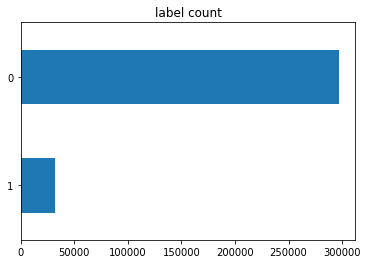

In [57]:
ax = label_count.sort_values().plot(kind='barh', title='label count')

#### Null values

In [58]:
model_all_data.isna().sum()

user_id                                     0
product_id                                  0
order_number                                0
order_dow                                   0
order_hour_of_day                           0
days_since_prior_order                  29995
unique_key                                  0
label                                       0
user_product__total_orders                  0
user_product__add_to_cart_order_mean        0
user_product__reordered_mean                0
user_product__most_dow                      0
user_product__most_hod                      0
product_total_order                         0
product_total_users                         0
product_add_to_cart                         0
product_reordered_rate                      0
product_most_dow                            0
product_most_hour_of_day                    0
product_day_since_prior_order_mean        726
product_aisle_id                            0
product_department                

deal with category data

In [59]:
department_cate= pd.get_dummies(model_all_data['product_department'], prefix='product_department_id_')

In [60]:
model_all_data

,user_id,product_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,unique_key,label,user_product__total_orders,user_product__add_to_cart_order_mean,...,product_most_hour_of_day,product_day_since_prior_order_mean,product_aisle_id,product_department,user_order_count,user_product_name,user_reordered_mean,user_days_since_prior_order_mean,user_most_dow,user_most_hour_of_day
0,152610,30597,22,6,8,10.0,152610_30597,0,5,2.00,...,9,12.592593,53,16,26,408,0.375000,10.953804,6,12
1,152610,15221,22,6,8,10.0,152610_15221,0,8,8.25,...,12,13.653846,84,16,26,408,0.375000,10.953804,6,12
2,152610,43772,22,6,8,10.0,152610_43772,0,2,3.00,...,12,12.008565,83,4,26,408,0.375000,10.953804,6,12
3,152610,37886,22,6,8,10.0,152610_37886,0,2,3.50,...,14,11.489362,53,16,26,408,0.375000,10.953804,6,12
4,152610,37215,22,6,8,10.0,152610_37215,0,1,5.00,...,13,11.490066,98,7,26,408,0.375000,10.953804,6,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329801,181465,32819,3,2,21,7.0,181465_32819,0,1,3.00,...,10,17.384615,20,11,3,6,0.166667,8.600000,2,21
329802,181465,29611,3,2,21,7.0,181465_29611,0,1,1.00,...,8,10.666667,45,19,3,6,0.166667,8.600000,2,21
329803,181465,20972,3,2,21,7.0,181465_20972,0,1,2.00,...,21,7.000000,37,1,3,6,0.166667,8.600000,2,21
329804,181465,5538,3,2,21,7.0,181465_5538,0,1,4.00,...,10,11.000000,133,11,3,6,0.166667,8.600000,2,21


In [61]:
model_all_data = pd.concat([model_all_data.drop('product_department',axis=1), department_cate],axis=1)

In [62]:
model_all_data

,user_id,product_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,unique_key,label,user_product__total_orders,user_product__add_to_cart_order_mean,...,product_department_id__12,product_department_id__13,product_department_id__14,product_department_id__15,product_department_id__16,product_department_id__17,product_department_id__18,product_department_id__19,product_department_id__20,product_department_id__21
0,152610,30597,22,6,8,10.0,152610_30597,0,5,2.00,...,0,0,0,0,1,0,0,0,0,0
1,152610,15221,22,6,8,10.0,152610_15221,0,8,8.25,...,0,0,0,0,1,0,0,0,0,0
2,152610,43772,22,6,8,10.0,152610_43772,0,2,3.00,...,0,0,0,0,0,0,0,0,0,0
3,152610,37886,22,6,8,10.0,152610_37886,0,2,3.50,...,0,0,0,0,1,0,0,0,0,0
4,152610,37215,22,6,8,10.0,152610_37215,0,1,5.00,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329801,181465,32819,3,2,21,7.0,181465_32819,0,1,3.00,...,0,0,0,0,0,0,0,0,0,0
329802,181465,29611,3,2,21,7.0,181465_29611,0,1,1.00,...,0,0,0,0,0,0,0,1,0,0
329803,181465,20972,3,2,21,7.0,181465_20972,0,1,2.00,...,0,0,0,0,0,0,0,0,0,0
329804,181465,5538,3,2,21,7.0,181465_5538,0,1,4.00,...,0,0,0,0,0,0,0,0,0,0


### Split data

In [63]:
test_user_ids = model_all_data.user_id.drop_duplicates().sample(frac=0.25)

train_data = model_all_data[~model_all_data.user_id.isin(test_user_ids)]
test_data = model_all_data[model_all_data.user_id.isin(test_user_ids)]

In [64]:
print('amount of total data: ', model_all_data.shape)
print('amount of training data: ', train_data.shape)
print('amount of testing data: ', test_data.shape)

amount of total data:  (329806, 48)
amount of training data:  (248851, 48)
amount of testing data:  (80955, 48)


### Model Selection with Cross Validation


In [65]:
train_data_x = train_data.drop(['user_id', 'product_id', 'label'], axis=1)
train_data_y = train_data['label'] 

In [66]:
classifiers = [LogisticRegression(), DecisionTreeClassifier(),
               RandomForestClassifier(), GradientBoostingClassifier()]

In [67]:
def build_pipline(classifier):
  steps = list()
  steps.append(('fillna', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)))
  steps.append(('underSample', RandomUnderSampler()))
  steps.append(('scaler', MinMaxScaler()))
  steps.append(('model', classifier))
  pipeline = Pipeline(steps=steps)
  return pipeline

In [68]:
for classifier in classifiers:
  pipeline = build_pipline(classifier)
  scores = cross_val_score(pipeline, train_data_x, train_data_y, cv=5, scoring='f1')
  print(classifier.__class__.__name__, ': F-1 score is %.2f (%.2f)' %(np.mean(scores)*100, np.std(scores)*100))
  print('__________________')

LogisticRegression : F-1 score is 34.65 (2.57)
__________________
DecisionTreeClassifier : F-1 score is 24.58 (1.12)
__________________
RandomForestClassifier : F-1 score is 33.20 (2.83)
__________________
GradientBoostingClassifier : F-1 score is 34.85 (3.11)
__________________


### feature selection


In [ ]:
# find pipeline without  hyperparameter tuning
pipeline2 = build_pipline(GradientBoostingClassifier())
pipeline2.fit(train_data_x, train_data_y)

In [ ]:
# find feature importance
importance = pipeline2.steps[3][1].feature_importances_
features = train_data_x.columns.tolist()

In [ ]:
importances = pd.DataFrame({'feature': features, 'importance':importance}).sort_values('importance', ascending=False)
top_15 = importances.head(15)

In [ ]:
train_data_x_features = train_data_x[top_15['feature']]

In [ ]:
top_15 